<a href="https://colab.research.google.com/github/SuprajaYadavH/Customer-Churn-Prediction-in-telecom-sector/blob/main/TeamHype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#CUSTOMER CHURN PREDICTION

In [1]:
import mlflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
data=pd.read_csv("C:/Users/supra/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:


data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data['tenure'] = data['tenure'].astype(float)

In [11]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#data.index=data.index(1,len(data)+1)

In [12]:
data.index = data.index + 1

In [13]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
data["tenure"].unique()

array([ 1., 34.,  2., 45.,  8., 22., 10., 28., 62., 13., 16., 58., 49.,
       25., 69., 52., 71., 21., 12., 30., 47., 72., 17., 27.,  5., 46.,
       11., 70., 63., 43., 15., 60., 18., 66.,  9.,  3., 31., 50., 64.,
       56.,  7., 42., 35., 48., 29., 65., 38., 68., 32., 55., 37., 36.,
       41.,  6.,  4., 33., 67., 23., 57., 61., 14., 20., 53., 40., 59.,
       24., 44., 19., 54., 51., 26.,  0., 39.])

In [16]:
data["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [17]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [18]:
#data["Churn"].value_counts()

In [19]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:


data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors="coerce")

In [21]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()

In [24]:
features=data["Churn"]

In [25]:
data["Churn"]=label_encoder.fit_transform(features)

In [26]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
5,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7040,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7041,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7042,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [ ]:
data["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [32]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
!pip install imblearn

In [36]:
# from imblearn.over_sampling import ADASYN

# X = data.drop("Churn", axis=1)  # Features without the target variable
# y = data["Churn"]               # Target variable

# ada = ADASYN(random_state=42)
# X_resampled, y_resampled = ada.fit_resample(X, y)



In [ ]:
data.Churn.value_counts()

0    5173
1    1870
Name: Churn, dtype: int64

In [37]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
data.dropna(axis=0,inplace=True)

In [39]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [41]:
data['Churn']=data["Churn"].astype(float)

In [42]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

Exploratory Data Analysis


C:\Users\supra\AppData\Local\Temp\ipykernel_19612\2317323714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Churn'], palette=purple_palette, linewidth=2)
C:\Users\supra\AppData\Local\Temp\ipykernel_19612\2317323714.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x=data['Churn'], palette=purple_palette, linewidth=2)


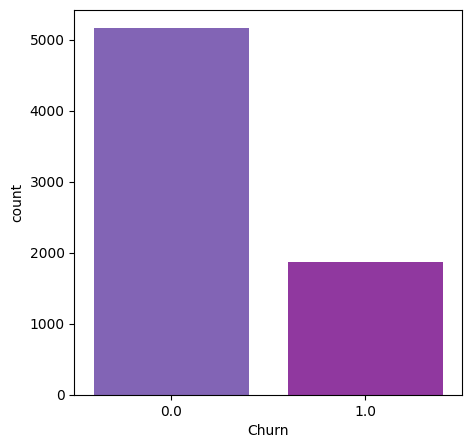

In [43]:
#countplot of churn
plt.figure(figsize=(5,5))
purple_palette = ["#7E57C2", "#9C27B0", "#673AB7"]
ax = sns.countplot(x=data['Churn'], palette=purple_palette, linewidth=2)
plt.show()

([<matplotlib.patches.Wedge at 0x215b8bcbb20>,
 [Text(-0.7383052116910712, 0.8154173252941114, 'churn= no'),
  Text(0.738305282977118, -0.8154172607494141, 'churn= yes')],
 [Text(-0.40271193364967517, 0.4447730865240607, '73.4%'),
  Text(0.40271197253297336, -0.4447730513178622, '26.6%')])

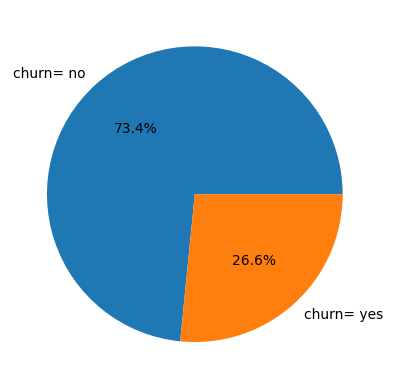

In [44]:
#pie chart of churn
category_counts = data['Churn'].value_counts()
labels = ["churn= no","churn= yes"]
sizes = category_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

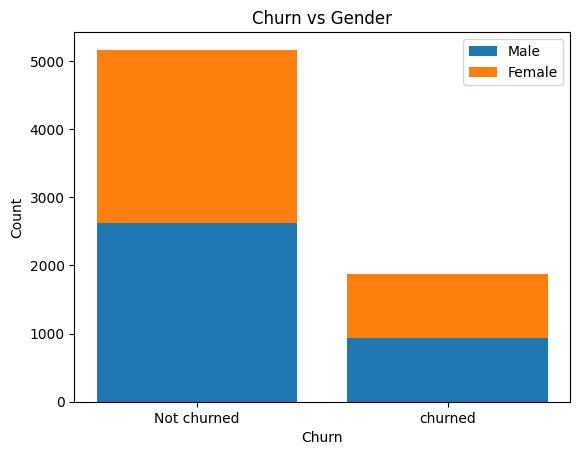

In [45]:
#STACKED barplot between churn vs gender
churn_counts = data['Churn'].value_counts().values
male_counts= data[data['gender'] == 'Male']['Churn'].value_counts().values
female_counts=data[data['gender'] == 'Female']['Churn'].value_counts().values

churn_labels=["Not churned", "churned"]

plt.bar(churn_labels,male_counts, label="Male")
plt.bar(churn_labels,female_counts, bottom=male_counts, label="Female")

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs Gender')

plt.legend()
plt.show()

In [46]:
gender_counts= data['gender'].value_counts()


In [47]:
churn_counts = data['Churn'].value_counts()
churn_counts

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [48]:

#number of males who have churned
males_churned = data[data['gender'] == 'Male']['Churn'].value_counts()[1.0]
print("Number of males who churned:", males_churned)

Number of males who churned: 930


In [49]:

##number of females who have churned
Females_churned = data[data['gender'] == 'Female']['Churn'].value_counts()[1.0]
print("Number of Females who churned:", Females_churned)

Number of Females who churned: 939


In [50]:
males_NOTchurned = data[data['gender'] == 'Male']['Churn'].value_counts()[0.0]
print("Number of males who have NOT churned:", males_NOTchurned)

Number of males who have NOT churned: 2619


In [51]:
Females_NOTchurned = data[data['gender'] == 'Female']['Churn'].value_counts()[0.0]
print("Number of Females who have NOT churned:", Females_NOTchurned)

Number of Females who have NOT churned: 2544


In [52]:

# to count number of total genders
num_values = len(data['gender'])
num_values

7032

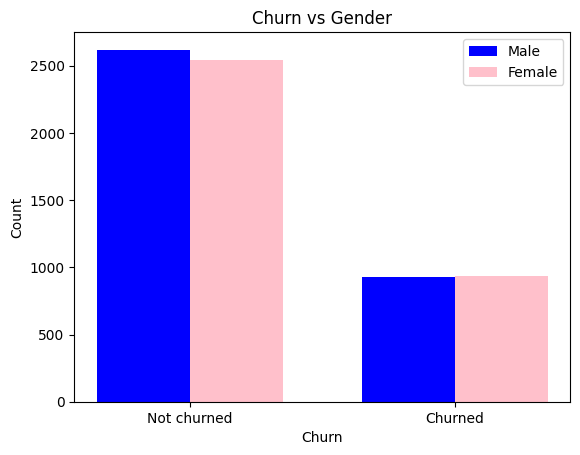

In [53]:


# Data for the plot
churn_labels = ["Not churned", "Churned"]
male_counts = data[data['gender'] == 'Male']['Churn'].value_counts().values
female_counts = data[data['gender'] == 'Female']['Churn'].value_counts().values

# Positions of the bars on the x-axis
r = np.arange(len(churn_labels))

# Create the side-by-side bar plot
plt.bar(r, male_counts, color='blue', width=0.35, label='Male')
plt.bar(r + 0.35, female_counts, color='pink', width=0.35, label='Female')

# Add x-axis labels, y-axis label, and plot title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs Gender')

# Add x-axis tick labels
plt.xticks(r + 0.35/2, churn_labels)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [54]:
# Total number of males and females
total_males = data[data['gender'] == 'Male'].shape[0]
total_females = data[data['gender'] == 'Female'].shape[0]

# Number of males who churned
males_churned = data[(data['gender'] == 'Male') & (data['Churn'] == 1)].shape[0]
females_churned = data[(data['gender'] == 'Female') & (data['Churn'] == 1)].shape[0]

# Calculate percentages
percent_males_churned = (males_churned / total_males) * 100
percent_females_churned = (females_churned / total_females) * 100

# Print the percentages
print(f"Percentage of males who churned: {percent_males_churned:.2f}%")
print(f"Percentage of females who churned: {percent_females_churned:.2f}%")


Percentage of males who churned: 26.20%
Percentage of females who churned: 26.96%


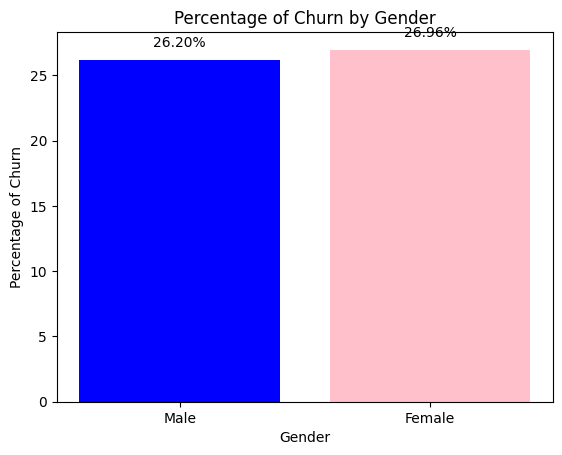

In [55]:
# Data for the plot
gender_labels = ['Male', 'Female']
churn_percentages = [percent_males_churned, percent_females_churned]

# Create the bar plot
plt.bar(gender_labels, churn_percentages, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Churn')
plt.title('Percentage of Churn by Gender')

# Display the percentages on top of bars
for i, value in enumerate(churn_percentages):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center')

# Show the plot
plt.show()


In [ ]:
r = np.arange(len(churn_labels))
r

array([0, 1])

Hypothesis-1
*   Females tend to churn slightly more than males
*   Men churn lesser than females.



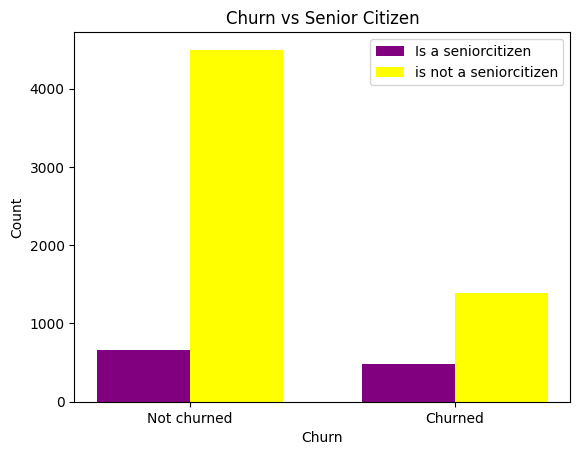

In [56]:

# Data for the plot
churn_labels = ["Not churned","Churned"]
yes_counts = data[data['SeniorCitizen'] == 1]['Churn'].value_counts().values
no_counts = data[data['SeniorCitizen'] == 0]['Churn'].value_counts().values

# Positions of the bars on the x-axis
r = np.arange(len(churn_labels))

# Create the side-by-side bar plot
plt.bar(r, yes_counts, color='purple', width=0.35, label='Is a seniorcitizen')
plt.bar(r + 0.35, no_counts, color='yellow', width=0.35, label='is not a seniorcitizen')

# Add x-axis labels, y-axis label, and plot title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs Senior Citizen')

# Add x-axis tick labels
plt.xticks(r + 0.35/2, churn_labels)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [57]:
# Total number of senior citizens and non-senior citizens
total_senior_citizens = data[data['SeniorCitizen'] == 1].shape[0]
total_non_senior_citizens = data[data['SeniorCitizen'] == 0].shape[0]

# Number of senior citizens who churned
senior_citizens_churned = data[(data['SeniorCitizen'] == 1) & (data['Churn'] == 1)].shape[0]
non_senior_citizens_churned = data[(data['SeniorCitizen'] == 0) & (data['Churn'] == 1)].shape[0]

# Calculate percentages
percent_senior_citizens_churned = (senior_citizens_churned / total_senior_citizens) * 100
percent_non_senior_citizens_churned = (non_senior_citizens_churned / total_non_senior_citizens) * 100

# Print the percentages
print(f"Percentage of senior citizens who churned: {percent_senior_citizens_churned:.2f}%")
print(f"Percentage of non-senior citizens who churned: {percent_non_senior_citizens_churned:.2f}%")


Percentage of senior citizens who churned: 41.68%
Percentage of non-senior citizens who churned: 23.65%


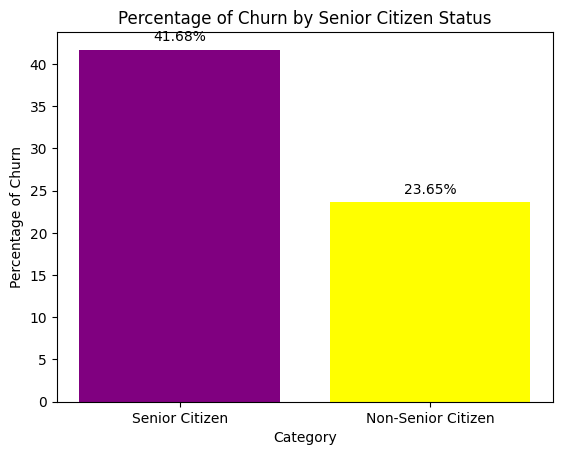

In [58]:
# Data for the plot
senior_labels = ['Senior Citizen', 'Non-Senior Citizen']
churn_percentages = [percent_senior_citizens_churned, percent_non_senior_citizens_churned]

# Create the bar plot
plt.bar(senior_labels, churn_percentages, color=['purple', 'yellow'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage of Churn')
plt.title('Percentage of Churn by Senior Citizen Status')

# Display the percentages on top of bars
for i, value in enumerate(churn_percentages):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center')

# Show the plot
plt.show()


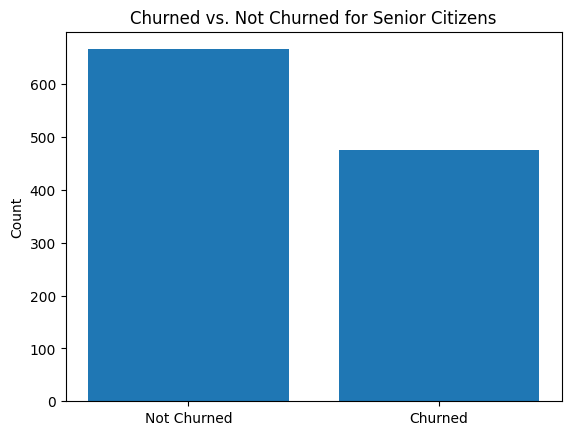

In [ ]:
senior_citizens_df = data[data['SeniorCitizen'] == 1]
churn_counts = senior_citizens_df['Churn'].value_counts()
plt.bar([ 'Not Churned','Churned'], churn_counts)
plt.ylabel('Count')
plt.title('Churned vs. Not Churned for Senior Citizens')
plt.show()



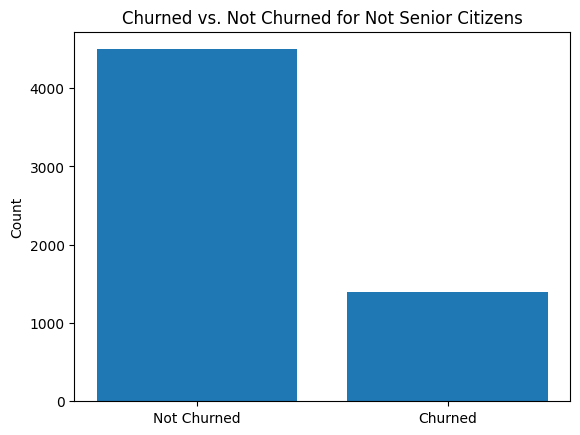

In [59]:
not_senior_citizens_df = data[data['SeniorCitizen'] == 0]
churn_counts = not_senior_citizens_df['Churn'].value_counts()
plt.bar([ 'Not Churned','Churned'], churn_counts)
plt.ylabel('Count')
plt.title('Churned vs. Not Churned for Not Senior Citizens')
plt.show()



In [ ]:
Senior_counts= data['SeniorCitizen'].value_counts()
Senior_counts

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Hypothesis 2:


*   Majority of the senior citizens  choose to churn






In [60]:
Partner_counts= data['Partner'].value_counts()
Partner_counts

Partner
No     3639
Yes    3393
Name: count, dtype: int64

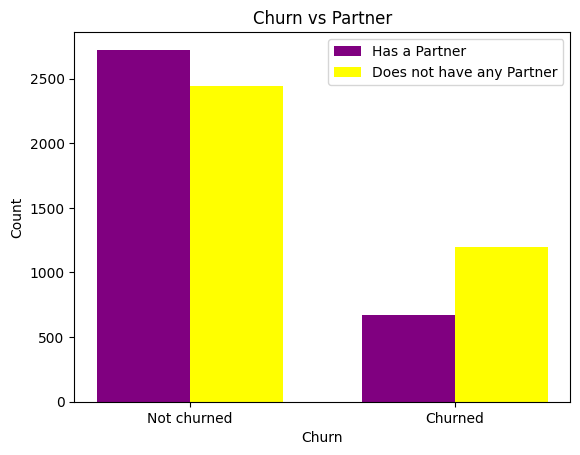

In [ ]:
# Data for the plot
churn_labels = ["Not churned", "Churned"]
yes_counts = data[data['Partner'] == 'Yes']['Churn'].value_counts().values
no_counts = data[data['Partner'] == 'No']['Churn'].value_counts().values

# Positions of the bars on the x-axis
r = np.arange(len(churn_labels))

# Create the side-by-side bar plot
plt.bar(r, yes_counts, color='purple', width=0.35, label='Has a Partner')
plt.bar(r + 0.35, no_counts, color='yellow', width=0.35, label='Does not have any Partner')

# Add x-axis labels, y-axis label, and plot title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs Partner')

# Add x-axis tick labels
plt.xticks(r + 0.35/2, churn_labels)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [61]:
# Total number of customers with and without a partner
total_with_partner = data[data['Partner'] == 'Yes'].shape[0]
total_without_partner = data[data['Partner'] == 'No'].shape[0]

# Number of customers with a partner who churned
with_partner_churned = data[(data['Partner'] == 'Yes') & (data['Churn'] == 1)].shape[0]
without_partner_churned = data[(data['Partner'] == 'No') & (data['Churn'] == 1)].shape[0]

# Calculate percentages
percent_with_partner_churned = (with_partner_churned / total_with_partner) * 100
percent_without_partner_churned = (without_partner_churned / total_without_partner) * 100

# Print the percentages
print(f"Percentage of customers with a partner who churned: {percent_with_partner_churned:.2f}%")
print(f"Percentage of customers without a partner who churned: {percent_without_partner_churned:.2f}%")


Percentage of customers with a partner who churned: 19.72%
Percentage of customers without a partner who churned: 32.98%


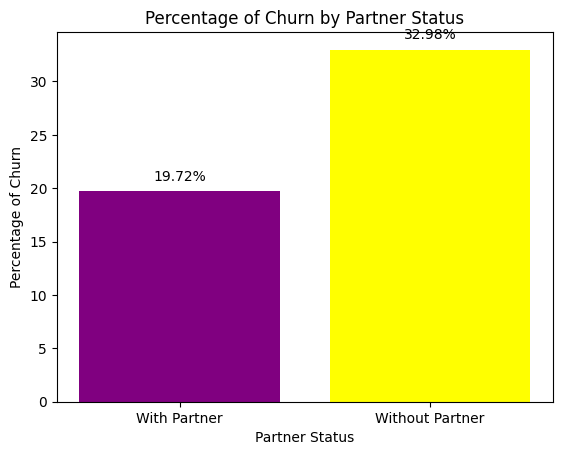

In [62]:
# Data for the plot
partner_labels = ['With Partner', 'Without Partner']
churn_percentages = [percent_with_partner_churned, percent_without_partner_churned]

# Create the bar plot
plt.bar(partner_labels, churn_percentages, color=['purple', 'yellow'])

# Add labels and title
plt.xlabel('Partner Status')
plt.ylabel('Percentage of Churn')
plt.title('Percentage of Churn by Partner Status')

# Display the percentages on top of bars
for i, value in enumerate(churn_percentages):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center')

# Show the plot
plt.show()


Hypothesis 3:

*   Customers who has partners won't tend to Churn becuase of the responsibilities and commitments they have.
*   But Customers who are single have the high tendency to Churn



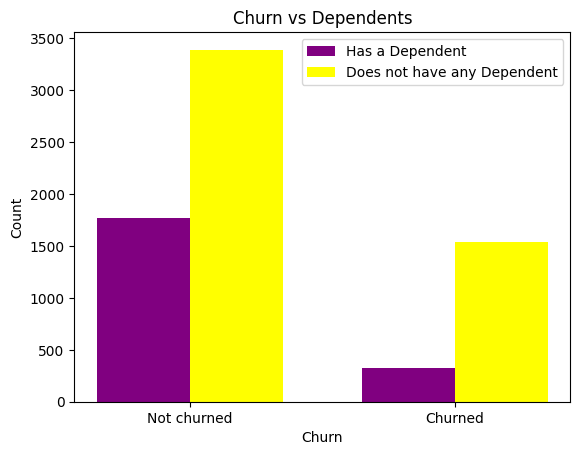

In [63]:
# Data for the plot
churn_labels = ["Not churned", "Churned"]
yes_counts = data[data['Dependents'] == 'Yes']['Churn'].value_counts().values
no_counts = data[data['Dependents'] == 'No']['Churn'].value_counts().values

# Positions of the bars on the x-axis
r = np.arange(len(churn_labels))

# Create the side-by-side bar plot
plt.bar(r, yes_counts, color='purple', width=0.35, label='Has a Dependent')
plt.bar(r + 0.35, no_counts, color='yellow', width=0.35, label='Does not have any Dependent')

# Add x-axis labels, y-axis label, and plot title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs Dependents')

# Add x-axis tick labels
plt.xticks(r + 0.35/2, churn_labels)

# Add a legend
plt.legend()

# Display the plot
plt.show()

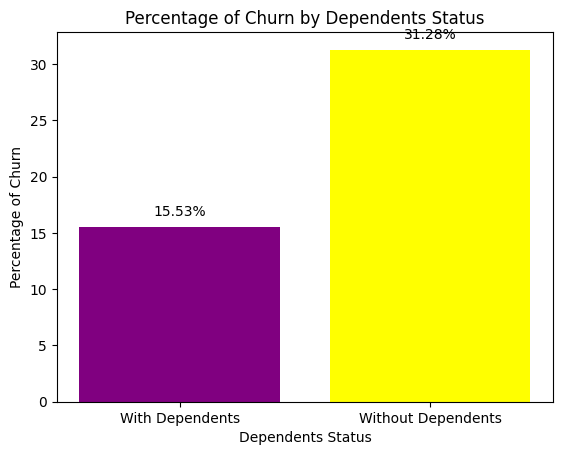

In [64]:
# Total number of customers with and without dependents
total_with_dependents = data[data['Dependents'] == 'Yes'].shape[0]
total_without_dependents = data[data['Dependents'] == 'No'].shape[0]

# Number of customers who churned
with_dependents_churned = data[(data['Dependents'] == 'Yes') & (data['Churn'] == 1)].shape[0]
without_dependents_churned = data[(data['Dependents'] == 'No') & (data['Churn'] == 1)].shape[0]

# Calculate percentages
percent_with_dependents_churned = (with_dependents_churned / total_with_dependents) * 100
percent_without_dependents_churned = (without_dependents_churned / total_without_dependents) * 100

# Data for the plot
dependents_labels = ['With Dependents', 'Without Dependents']
churn_percentages = [percent_with_dependents_churned, percent_without_dependents_churned]

# Create the bar plot
plt.bar(dependents_labels, churn_percentages, color=['purple', 'yellow'])

# Add labels and title
plt.xlabel('Dependents Status')
plt.ylabel('Percentage of Churn')
plt.title('Percentage of Churn by Dependents Status')

# Display the percentages on top of bars
for i, value in enumerate(churn_percentages):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center')

# Show the plot
plt.show()


In [ ]:
def countplot(x, y, data):
    num_plots = len(y)
    rows = int(num_plots / 2) + (num_plots % 2)
    columns = 2

    fig, axes = plt.subplots(rows, columns, figsize=(12, 7))

    for i, feature in enumerate(y):
        row = i // columns
        col = i % columns

        ax = axes[row, col]
        sns.countplot(x=x, hue=feature, data=data, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor="black", ax=ax)
        ax.set_title(feature)

    plt.tight_layout()
    plt.show()


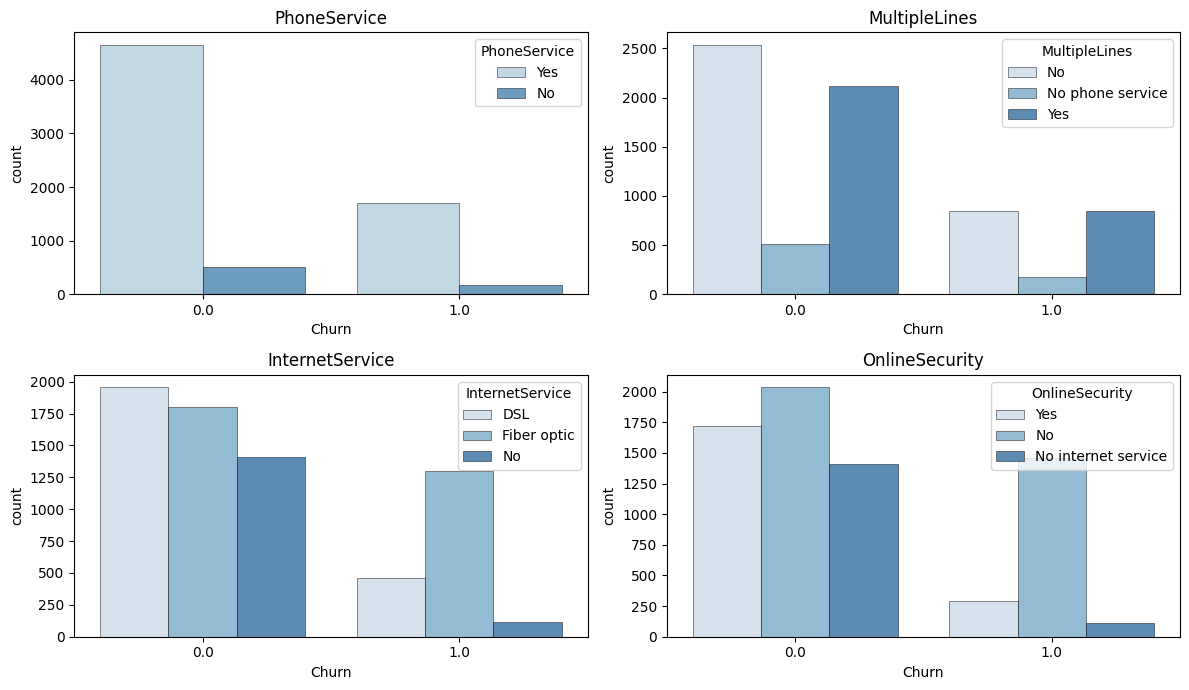

In [ ]:
countplot("Churn",['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],data)

Hypothesis

1. comparitively more customers with Phone service do not prefer to Churn
2. 40% of the customers with multiple lines tend to churn more.
3. - Customers with DSL installed have low chances of Churning while
   - The customers with Fiber optic has high chances of churning
   - And the customers with no Internet service wont choose to Churn much
4. - Customers with online security are mostly loyal to the company and wont choose to churn much.
   - Customers with no online security churn more.
   - customers who dont ave internet service also does not churn much.

  





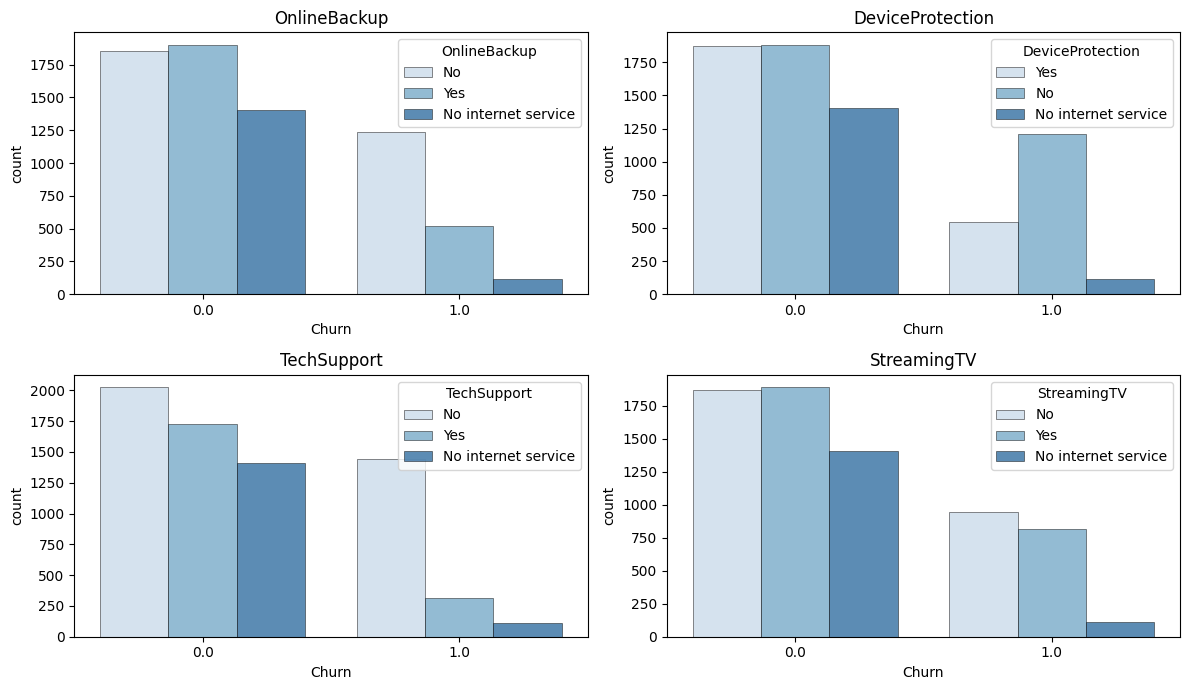

In [ ]:
countplot("Churn", ['OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV'],data)

Hypothesis

 Basicaly the Customers with No online Backup,No Device Protection,No tech support and No Streaming TV tend to Churn More


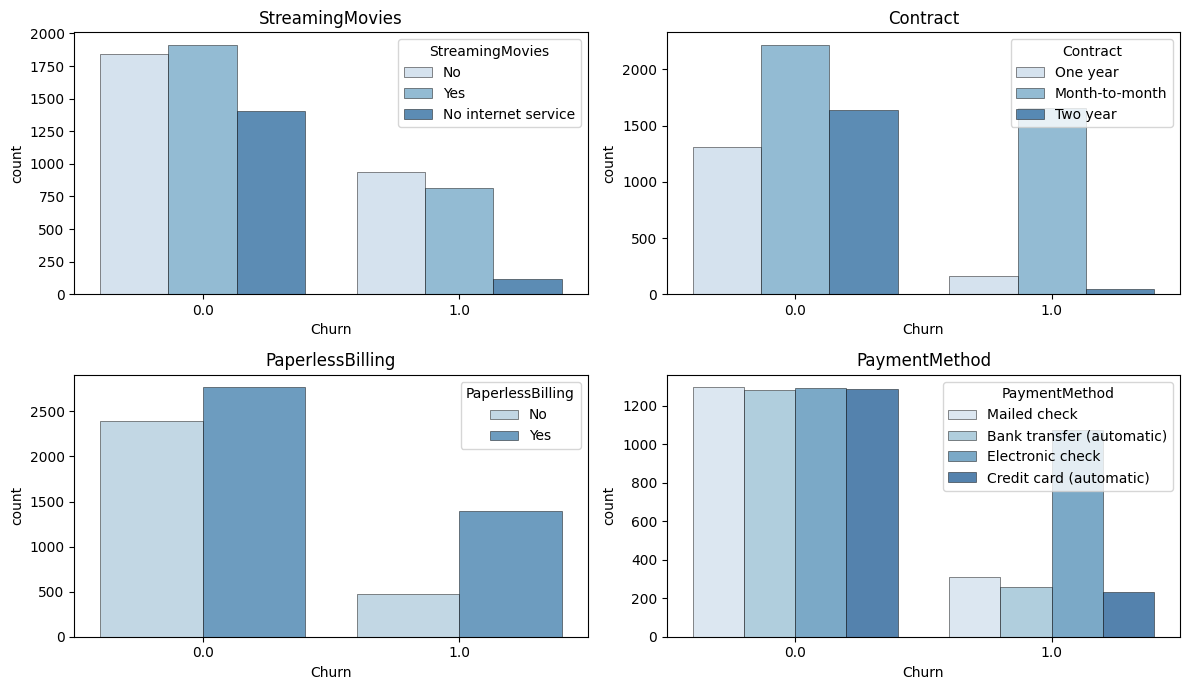

In [ ]:
countplot("Churn",['StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'],data)

Hypothesis

1.   Customers who have not subscribed for streaming movies tend to churn more.
2.   Customer who prefer paperless billing are the ones who churn more, than the ones who does not prefer paperless billing.
3.   Customers with Two year contract wouldn't churn much.
     Customers with one year contract also churn less.
     Majority of customers with month-to-month contract churn.
4.   Customers with Electronic check payment method churn the most, compared to other payment methods.



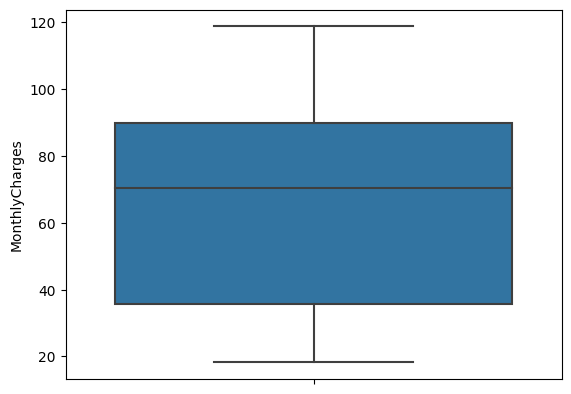

In [ ]:
#Boxplot for monthlycharges
import seaborn as sns
sns.boxplot(y=data["MonthlyCharges"])
plt.show()

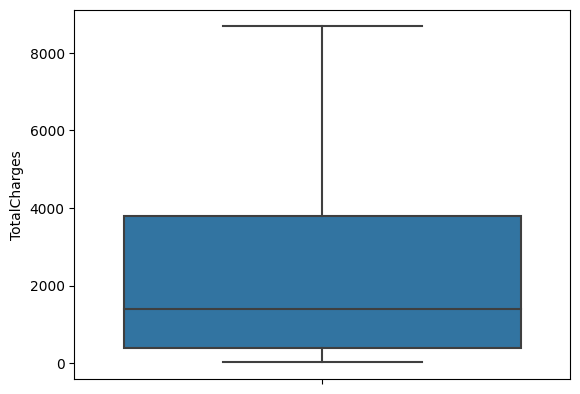

In [ ]:
#Boxplot for TotalCharges
import seaborn as sns
sns.boxplot(y=data["TotalCharges"])
plt.show()

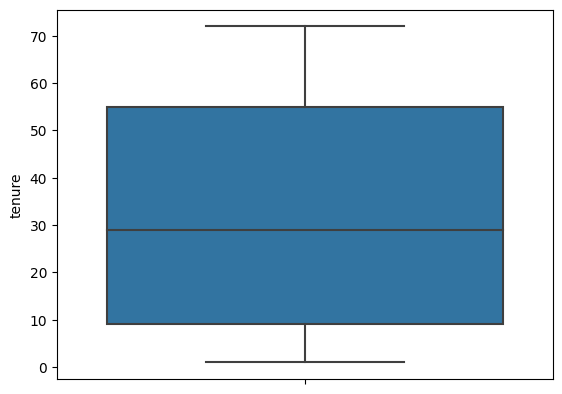

In [ ]:
#Boxplot for tenure
import seaborn as sns
sns.boxplot(y=data["tenure"])
plt.show()

From the Boxplot we infer that there are no OUTLIERS in these respected columns

## **Feature** **Engineering**

In [65]:
data.drop(["customerID"],axis=1,inplace=True)

KeyError: "['customerID'] not found in axis"

In [66]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
2,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
3,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
4,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
5,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


In [67]:
features1=data.iloc[:,[0,2,3,5,15]]

In [68]:
features1

,gender,Partner,Dependents,PhoneService,PaperlessBilling
1,Female,Yes,No,No,Yes
2,Male,No,No,Yes,No
3,Male,No,No,Yes,Yes
4,Male,No,No,No,No
5,Female,No,No,Yes,Yes
...,...,...,...,...,...
7039,Male,Yes,Yes,Yes,Yes
7040,Female,Yes,Yes,Yes,Yes
7041,Female,Yes,Yes,No,Yes
7042,Male,Yes,No,Yes,Yes


In [69]:
for col in features1:
    data[col] = label_encoder.fit_transform(data[col])

In [70]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,0,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0.0
2,1,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0.0
3,1,0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1.0
4,1,0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0.0
5,0,0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1.0


In [71]:
data1=data.iloc[:,[0,1,2,3,15]]

In [72]:
data1

,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling
1,0,0,1,0,1
2,1,0,0,0,0
3,1,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1
...,...,...,...,...,...
7039,1,0,1,1,1
7040,0,0,1,1,1
7041,0,0,1,1,1
7042,1,1,1,0,1


In [73]:
features2=data.iloc[:,[6,7,8,9,10,11,12,13,14,16]]

In [74]:
data_encoded = pd.get_dummies(features2)
data_encoded

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,False,True,False,True,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,True,False,False,True,False,False,False,False,True,True,...,True,False,False,False,True,False,False,False,False,True
3,True,False,False,True,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
4,False,True,False,True,False,False,False,False,True,True,...,True,False,False,False,True,False,True,False,False,False
5,True,False,False,False,True,False,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,False,False,True,True,False,False,False,False,True,True,...,False,False,True,False,True,False,False,False,False,True
7040,False,False,True,False,True,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
7041,False,True,False,True,False,False,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False
7042,False,False,True,False,True,False,True,False,False,True,...,True,False,False,True,False,False,False,False,False,True


In [75]:
features3=data.iloc[:,[4,17,18,19]]

In [76]:
df = pd.concat([data1, data_encoded,features3], axis=1)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,34.0,56.95,1889.50,0.0
2,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,2.0,53.85,108.15,1.0
3,1,0,0,0,0,0,1,0,1,0,...,1,0,1,0,0,0,45.0,42.30,1840.75,0.0
4,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,2.0,70.70,151.65,1.0
5,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,8.0,99.65,820.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,0,0,1,1,1,0,0,1,0,1,...,1,0,0,1,0,0,72.0,103.20,7362.90,0.0
7040,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,1,0,11.0,29.60,346.45,0.0
7041,1,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,4.0,74.40,306.60,1.0
7042,1,0,0,0,1,1,0,0,0,1,...,0,1,1,0,0,0,66.0,105.65,6844.50,0.0


In [77]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'Paymen

In [78]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
PaperlessBilling                             int64
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes                            bool
OnlineBackup_No                               bool
OnlineBackup_No internet service              bool
OnlineBackup_Yes                              bool
DeviceProtection_No                           bool
DeviceProtection_No internet service          bool
DeviceProtection_Yes           

Each column in a one-hot encoded DataFrame will typically have a data type of uint8

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features3=["tenure","MonthlyCharges","TotalCharges"]

data1_num=pd.DataFrame(df,columns=features3)
rescaled_f=scaler.fit_transform(data1_num)

df_remaining_f=df.drop(columns=features3)

df_rescaled_f=pd.DataFrame(rescaled_f,columns=features3,index=df_remaining_f.index)

df1=pd.concat([df_remaining_f,df_rescaled_f],axis=1)


In [81]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,tenure,MonthlyCharges,TotalCharges
1,0,0,1,0,1,False,True,False,True,False,...,False,False,False,False,True,False,0.0,0.000000,0.115423,0.001275
2,1,0,0,0,0,True,False,False,True,False,...,True,False,False,False,False,True,0.0,0.464789,0.385075,0.215867
3,1,0,0,0,1,True,False,False,True,False,...,False,False,False,False,False,True,1.0,0.014085,0.354229,0.010310
4,1,0,0,0,0,False,True,False,True,False,...,True,False,True,False,False,False,0.0,0.619718,0.239303,0.210241
5,0,0,0,0,1,True,False,False,False,True,...,False,False,False,False,True,False,1.0,0.014085,0.521891,0.015330


In [ ]:
#correlation analysis

In [82]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Churn'].drop('Churn')

In [83]:
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(correlation_with_target)

Contract_Month-to-month                    0.404565
tenure                                     0.354049
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
Contract_Two year                          0.301552
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
StreamingTV_No internet service            0.227578
OnlineBackup_No internet service           0.227578
TechSupport_No internet service            0.227578
DeviceProtection_No internet service       0.227578
OnlineSecurity_No internet service         0.227578
StreamingMovies_No internet service        0.227578
InternetService_No                         0.227578
TotalCharges                               0.199484
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
Contract_One

MODEL TRAINING

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x1=df.drop(["Churn","gender","MultipleLines_No phone service","MultipleLines_No","MultipleLines_Yes","StreamingMovies_Yes","StreamingTV_Yes","DeviceProtection_Yes"],axis=1)

In [87]:
x1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [89]:
from imblearn.over_sampling import ADASYN

X = x1.copy()  # Features without the target variable
y = data["Churn"]               # Target variable

ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X, y)



In [91]:
y_resampled.value_counts()


Churn
1.0    5246
0.0    5163
Name: count, dtype: int64

In [ ]:
#x1=x.values

In [ ]:
#type(x1)

In [ ]:
#type(x)

In [ ]:

# y1=df["Churn"]

In [ ]:
#type(y)

In [ ]:
#y1=y.values

In [ ]:
#type(y1)

In [92]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=100)

In [94]:
# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [128]:

params = {
    'penalty': 'l2',
    'class_weight': 'balanced',
    'random_state': 42,
    'max_iter': 1000,
}

log_reg= LogisticRegression(**params)

In [129]:
log_reg.fit(x1_train,y1_train)

c:\Users\supra\Desktop\projects\Customer-Churn-Prediction-in-telecom-sector\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [130]:
log_reg.coef_

array([[ 1.04492113e-01, -3.15220132e-01, -2.76407025e-01,
        -1.26065066e-01, -1.35027625e+00,  1.92618951e+00,
         2.02478763e-01,  2.33672475e+00,  2.02478763e-01,
         2.03728829e+00,  2.27746486e+00,  2.02478763e-01,
         2.46079071e+00, -1.91417544e-01,  2.02478763e-01,
         2.26132369e+00,  2.02478763e-01,  2.07116310e+00,
        -8.50268501e-01,  2.02478763e-01, -8.98259414e-01,
         2.02478763e-01,  1.85739078e+00,  1.22815994e+00,
         1.22723739e+00,  3.12216343e+00,  2.91005266e+00,
         3.55202538e+00,  2.88466847e+00, -8.32805275e-02,
        -7.77421835e-02,  6.11216825e-04]])

In [131]:
log_reg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)>

In [132]:
y_pred = log_reg.predict(x1_test)

In [133]:
y_pred

array([0., 1., 0., ..., 1., 1., 1.])

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score ,precision_score, recall_score

In [135]:
report = classification_report(y1_test, y_pred)
accuracy = accuracy_score(y1_test, y_pred)
roc_auc_score = roc_auc_score(y1_test, y_pred)


In [136]:
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1541
         1.0       0.85      0.81      0.83      1582

    accuracy                           0.83      3123
   macro avg       0.83      0.83      0.83      3123
weighted avg       0.83      0.83      0.83      3123



In [137]:
report_dict = classification_report(y1_test, y_pred, output_dict= True)

In [138]:
print(report_dict)

{'0.0': {'precision': 0.8173913043478261, 'recall': 0.853990914990266, 'f1-score': 0.8352903840050777, 'support': 1541.0}, '1.0': {'precision': 0.8512888301387971, 'recall': 0.8141592920353983, 'f1-score': 0.8323101777059774, 'support': 1582.0}, 'accuracy': 0.8338136407300673, 'macro avg': {'precision': 0.8343400672433117, 'recall': 0.8340751035128322, 'f1-score': 0.8338002808555276, 'support': 3123.0}, 'weighted avg': {'precision': 0.834562577419013, 'recall': 0.8338136407300673, 'f1-score': 0.8337807181820943, 'support': 3123.0}}


In [105]:
print(roc_auc_score)

0.8105384964366318


In [122]:
cm= confusion_matrix(y1_test, y_pred)

In [123]:
print(cm)

[[1148  393]
 [ 196 1386]]


In [139]:
# print(precision) 
# #Precision measures how many of the model’s positive predictions are correct.
# #High precision means the model rarely makes a positive prediction unless it's quite sure it's right.
# print(recall)
# # Recall measures how many of the actual positive instances the model catches.
# # High recall means the model rarely misses a positive instance.

In [140]:
import mlflow

In [155]:
mlflow.set_experiment("First Experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="base model"):
    mlflow.log_params(params)
    mlflow.log_metrics({

        "accuracy" : report_dict["accuracy"],
        "recall_class_0":report_dict['0.0']['recall'],
        "recall_class_1":report_dict['1.0']['recall'],
        "f1_score_macro": report_dict["macro avg"]["f1-score"]
        

    })
            
    mlflow.sklearn.log_model(log_reg, "Logistic Regression")


2024/11/15 22:30:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/15 22:30:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run base model at: http://127.0.0.1:5000/#/experiments/567045585582436708/runs/834a230bfcff46518c2170f1b46113d9.
2024/11/15 22:30:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/567045585582436708.


In [154]:
report_dict

{'0.0': {'precision': 0.8173913043478261,
  'recall': 0.853990914990266,
  'f1-score': 0.8352903840050777,
  'support': 1541.0},
 '1.0': {'precision': 0.8512888301387971,
  'recall': 0.8141592920353983,
  'f1-score': 0.8323101777059774,
  'support': 1582.0},
 'accuracy': 0.8338136407300673,
 'macro avg': {'precision': 0.8343400672433117,
  'recall': 0.8340751035128322,
  'f1-score': 0.8338002808555276,
  'support': 3123.0},
 'weighted avg': {'precision': 0.834562577419013,
  'recall': 0.8338136407300673,
  'f1-score': 0.8337807181820943,
  'support': 3123.0}}

#Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x1_train, y1_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(x1_test)

In [ ]:
accuracy = accuracy_score(y1_test, y_pred)
conf_matrix = confusion_matrix(y1_test, y_pred)
classification_rep = classification_report(y1_test, y_pred)

In [ ]:
print(accuracy)
print(conf_matrix)
print(classification_rep)

0.7924170616113744
[[1378  149]
 [ 289  294]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1527
         1.0       0.66      0.50      0.57       583

    accuracy                           0.79      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [ ]:
y_train_pred = rf_classifier.predict(x1_train)

In [ ]:
accuracy_train = accuracy_score(y1_train, y_train_pred)

In [ ]:
print(accuracy_train)

0.9975619666802112


# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

In [ ]:
xgb_classifier.fit(x1_train, y1_train)
y_pred = xgb_classifier.predict(x1_test)

In [ ]:
accuracy = accuracy_score(y1_test, y_pred)
conf_matrix = confusion_matrix(y1_test, y_pred)
classification_rep = classification_report(y1_test, y_pred)

In [ ]:
print(accuracy)
print(conf_matrix)
print(classification_rep)

0.785781990521327
[[1355  172]
 [ 280  303]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1527
         1.0       0.64      0.52      0.57       583

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Deep-BP-ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x1_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 50
batch_size = 32
model.fit(x1_train, y1_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
139/139 [==============================] - 1s 4ms/step - loss: 2.7358 - accuracy: 0.6918 - val_loss: 0.5998 - val_accuracy: 0.7647
Epoch 2/50
139/139 [==============================] - 0s 3ms/step - loss: 1.2295 - accuracy: 0.7352 - val_loss: 0.6062 - val_accuracy: 0.7911
Epoch 3/50
139/139 [==============================] - 1s 4ms/step - loss: 1.1726 - accuracy: 0.7419 - val_loss: 1.2457 - val_accuracy: 0.5193
Epoch 4/50
139/139 [==============================] - 1s 4ms/step - loss: 1.5161 - accuracy: 0.7401 - val_loss: 0.5369 - val_accuracy: 0.7748
Epoch 5/50
139/139 [==============================] - 1s 4ms/step - loss: 1.5250 - accuracy: 0.7324 - val_loss: 1.1436 - val_accuracy: 0.7992
Epoch 6/50
139/139 [==============================] - 1s 4ms/step - loss: 1.6519 - accuracy: 0.7435 - val_loss: 2.7001 - val_accuracy: 0.7647
Epoch 7/50
139/139 [==============================] - 0s 4ms/step - loss: 1.8910 - accuracy: 0.7343 - val_loss: 1.7156 - val_accuracy: 0.5193
Epoch 

In [ ]:
loss, accuracy = model.evaluate(x1_test, y1_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

66/66 [==============================] - 0s 1ms/step - loss: 0.8358 - accuracy: 0.7867
Test Loss: 0.8358326554298401
Test Accuracy: 0.7867298722267151
